In [1]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'  # for better displayed plots

plt.rcParams['lines.linewidth'] = 2   # default linewidth for our lines
plt.rcParams['svg.fonttype'] = 'none' # output SVG figure with text as text. See https://stackoverflow.com/questions/34387893/output-matplotlib-figure-to-svg-with-text-as-text-not-curves

label_size = 20  # axis label size
plt.rcParams['xtick.labelsize'] = label_size - 3  # tick labels should be smaller than axes labels (by 3 in our case)
plt.rcParams['ytick.labelsize'] = label_size - 3
plt.rcParams['legend.fontsize'] = label_size - 5
plt.rcParams['legend.frameon'] = False

The **[Lorentz distribution](https://en.wikipedia.org/wiki/Cauchy_distribution)** is described by the following formula:

<center>$f(x; x_{0}, \gamma) = \frac{1}{\pi \gamma} [\frac{\gamma ^{2}}{ (x - x_{0})^{2} + (\gamma)^{2} }]$
    
where $x_{0}$ specifies the location of the peak of the distribution, and $\gamma$ specifies the half width at half maximum (alternatively, $2\gamma$ is the full width at half maximum).

In [2]:
def Lorentzian(x, x_0, gamma):
    return gamma/(np.pi*( (x - x_0)**2 + gamma**2 ))

x = np.linspace(-5, 5, 200)

L1 = Lorentzian(x, x_0 = 0, gamma = 0.5)
L2 = Lorentzian(x, x_0 = 0, gamma = 1.0)
L3 = Lorentzian(x, x_0 = -2, gamma = 1.0)

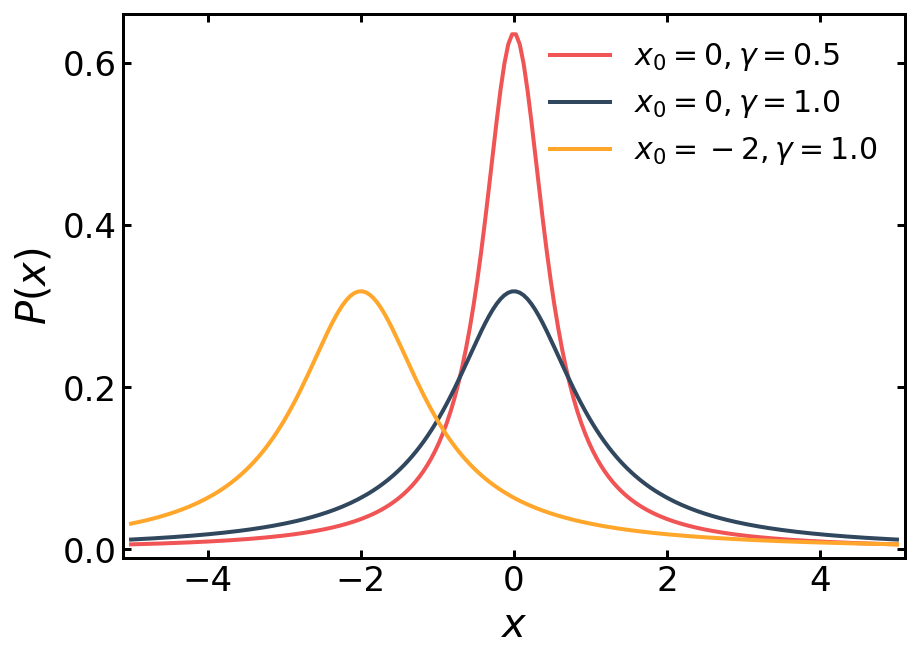

In [3]:
fig, ax = plt.subplots(figsize = (7, 5))

plt.plot(x, L1, color = '#f05454', linestyle = '-', marker = '', label = '$x_{0} = 0, \gamma = 0.5$')
plt.plot(x, L2, color = '#30475e', linestyle = '-', marker = '', label = '$x_{0} = 0, \gamma = 1.0$')
plt.plot(x, L3, color = '#ffa62b', linestyle = '-', marker = '', label = '$x_{0} = -2, \gamma = 1.0$')

# Customize the x-axis: set the limit, label name + size, and tick location
plt.xlim([-5.1, 5.1])
plt.xlabel('$x$', size = label_size)
plt.xticks([-4, -2, 0, 2, 4])

# Customize the y-axis
plt.ylim([-0.01, 0.66])
plt.ylabel('$P(x)$', size = label_size)
plt.yticks([0.0, 0.2, 0.4, 0.6])

# Activate and customize ticks on all axes (not just the default bottom and left axes)
plt.tick_params(top = 'on', bottom = 'on', left = 'on', right = 'on', 
                direction = 'in', length = 4, width = 1.5)

plt.setp(ax.spines.values(), linewidth = 1.5)  # sets the linewidth/thickness of all axes

plt.legend();
plt.savefig('Lorentz_distribution.svg');